## Homework

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [117]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

* Load the data.
* Look at the `median_house_value` variable. 
* **Question**: Does it have a long tail? 

In [118]:
# loading teh data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

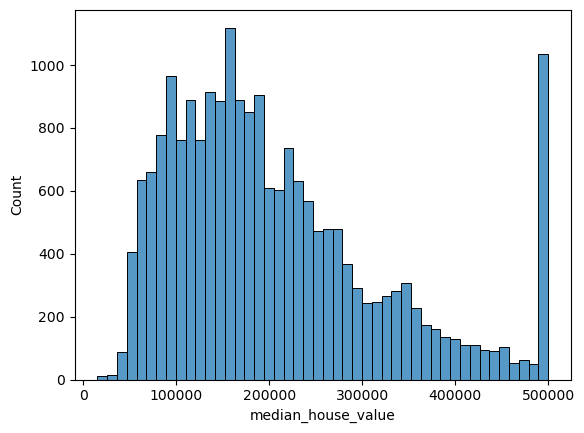

In [119]:
# checking the distribution
sns.histplot(df.median_house_value)

**Answer:** Notice there is no long tail

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [120]:
# Notice the columns to use are all the columsn except the last one
df = df[df.columns[:-1]]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [121]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [122]:
#Q1's answer:

207

207

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [123]:
df.population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [124]:
#Q2's answer:

1166.000000

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [125]:
np.random.seed(42)
n = df.shape[0]
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [126]:
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [127]:
train_size = int(n*0.6)
val_size = int(n*0.2)
test_size = n - train_size - val_size

(train_size, val_size, test_size)

(12384, 4128, 4128)

In [128]:
from typing import Tuple


def get_features_and_target(df:pd.DataFrame, start:int=None, end:int=None) -> Tuple[pd.DataFrame, np.array]:
    features = df.iloc[start:end].copy().reset_index(drop=True)
    target = np.log1p(features.median_house_value.values)
    del features['median_house_value']
    return (features, target)

In [129]:
df_shuffled = df.iloc[idx]
df_train, y_train = get_features_and_target(df_shuffled, end=train_size)
df_val, y_val = get_features_and_target(df_shuffled, start=train_size, end=train_size + val_size)
df_test, y_test = get_features_and_target(df_shuffled, start=train_size + val_size)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [130]:
def prepare_X(df: pd.DataFrame, fillna:float = 0.0):
    X = df.fillna(fillna).values
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    return X

def train_linear_regression_reg(X:np.ndarray, y:np.array, r=0.0):
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    w = np.linalg.solve(XTX, X.T.dot(y))
    return w

def get_root_mean_square_error(w:np.array, X:np.ndarray, y:np.array):
    y_pred = X.dot(w)
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def test_use_case(df_train:pd.DataFrame, y_train: np.array, df_val:pd.DataFrame, y_val:np.array, fillna:float=0, r:float=0):
    X_train = prepare_X(df_train, fillna=fillna)
    w = train_linear_regression_reg(X_train, y_train, r=r)
    rmse = get_root_mean_square_error(w, prepare_X(df_val, fillna=fillna), y_val)
    return rmse


In [131]:
# Filling missing values with: 0
rmse_zero = test_use_case(df_train, y_train, df_val, y_val, fillna=0, r=0)
rmse_zero

0.3295330365229253

In [132]:
# Filling missing values with: mean of the train set
total_bedrroms_mean = df_train.total_bedrooms.describe()['50%']
rmse_mean = test_use_case(df_train, y_train, df_val, y_val, fillna=total_bedrroms_mean,r=0)
rmse_mean

0.32905018421407184

In [133]:
print('MEAN' if rmse_mean < rmse_zero else 'ZERO')

MEAN


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [134]:
r_options = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r_value in r_options:
    rmse = test_use_case(df_train, y_train, df_val, y_val, fillna=0, r=r_value)
    print(r_value, np.round(rmse, 2))

0 0.33
1e-06 0.33
0.0001 0.33
0.001 0.33
0.01 0.33
0.1 0.33
1 0.33
5 0.34
10 0.34


In [135]:
# Q4's answer:
0

0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.
Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [136]:
scores = np.zeros(10)
for s in range(10):
    np.random.seed(s)
    n = df.shape[0]
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    df_train, y_train = get_features_and_target(df_shuffled, end=train_size)
    df_val, y_val = get_features_and_target(df_shuffled, start=train_size, end=train_size + val_size)
    df_test, y_test = get_features_and_target(df_shuffled, start=train_size + val_size)

    rmse = test_use_case(df_train=df_train, y_train=y_train, df_val=df_val, y_val=y_val, fillna=0, r=0)
    print(s, rmse)
    scores[s] = rmse
np.round(np.std(scores), 3)

    

0 0.33884304805303095
1 0.3362387255956164
2 0.33209123188349565
3 0.34051536090357754
4 0.33890240665739635
5 0.3434866725718802
6 0.3451980953099989
7 0.33959899274106453
8 0.3466230873184187
9 0.33659261241800625


0.004

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245


In [137]:
np.random.seed(9)
n = df.shape[0]
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train, y_train = get_features_and_target(df_shuffled, end=train_size)
df_val, y_val = get_features_and_target(df_shuffled, start=train_size, end=train_size + val_size)
df_test, y_test = get_features_and_target(df_shuffled, start=train_size + val_size)

In [138]:
# combining train adn validation data sets
df_train_full = pd.concat((df_train, df_val))
y_train_full = np.concatenate((y_train, y_val))
test_use_case(df_train=df_train_full, y_train=y_train_full, df_val=df_test, y_val=y_test, fillna=0, r=0.001)
 

0.3453168914369138